<a href="https://colab.research.google.com/github/AkeemLawrence/Data-602/blob/main/NYC_Motor_Vehicle_Collisions_City_Safety_Analyst_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: NYC Motor Vehicle Collisions - City Safety Analyst Report

**Overview**

In this one-hour live meetup, you’ll work in small groups (2-3 students) as City Safety Analysts for the NYC Department of Transportation. Your team has been assigned a borough to analyze data from the NYC Motor Vehicle Collisions Dataset, which tracks vehicle crashes across the city. Your task is to investigate crash patterns, identify safety risks, and propose data-driven recommendations to reduce accidents. Each group will present a concise "Safety Report" to the "DOT leadership" (the class), simulating a workplace briefing.

---



**Dataset Description**

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

Check out this link for info on columns


---



# Workplace Scenario: City Safety Analysts

**Role**: You’re a team of analysts tasked with improving road safety in your assigned borough.

**Objective**: Use data to pinpoint a key safety issue and recommend a actionable solution (e.g., "Install speed bumps on high-speed crash zones").

**Presentation**: Deliver a concise "Safety Report" as if briefing DOT leadership, including:

* A key finding (e.g., "40% of crashes are due to driver distraction").
* A visualization (e.g., bar chart).
* A recommendation (e.g., "Increase distracted driving awareness campaigns").



---



**Analysis** (35 minutes): Groups analyze their borough’s data, focusing on:

* Common causes of crashes.
* Patterns in time or severity.
* High-risk factors or areas.

**Prepare Presentation** (10 minutes): Create a "Safety Report" with a visualization and a practical recommendation (e.g., new traffic signal, speed cameras).

**Present** (15 minutes): Each group presents their report (2-3 minutes) as if briefing DOT leadership, followed by a quick class discussion.


---




# Guided Open-Ended Questions

**Each group should answer 1-2 of these questions for their borough:**

What are the most common causes of crashes in your borough?

* Example: Bar chart of top contributing factors.

* Follow-Up: Are any causes unexpectedly frequent?


When do crashes happen most often in your borough?
* Example: Line plot or histogram of crashes by hour or month.
* Follow-Up: Are there peak times tied to specific factors (e.g., rush hour distractions)?

How severe are crashes in your borough?

* Example: Bar chart of crashes by injury/fatality count.
* Follow-Up: Which factors lead to the most severe outcomes?

Which crashes could have been prevented with better infrastructure?
* Example: Filter for factors like "Unsafe Speed" or "Traffic Control Disregarded" and visualize.
* Follow-Up: Are there patterns suggesting specific fixes (e.g., more stop signs)?

Open-Ended Exploration: What unique safety challenge does your borough face?
* Example: Compare injury rates to crash frequency or identify the deadliest crash type.

More Ideas: Crashes by vehicle type, seasonal trends, etc.

**Tips for Success**

* Collaboration: Divide roles (e.g., one person analyzes causes, another plots time trends, another drafts the recommendation).
* Practicality: Focus on actionable insights, as in a real job.
* Presentation: Keep it concise, like a professional briefing.

**Example Safety Report**

* “We’re the Queens Safety Analysts. Our data shows unsafe speed is the top crash cause.”
* (Show bar chart of top factors.)
* “We recommend speed cameras on major arterials to reduce incidents.”

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (10,000 rows, all boroughs)
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.json?$limit=10000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert key columns
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M', errors='coerce').dt.hour
df['number_of_persons_injured'] = pd.to_numeric(df['number_of_persons_injured'], errors='coerce')
df['number_of_persons_killed'] = pd.to_numeric(df['number_of_persons_killed'], errors='coerce')

# Inspect columns and first few rows
print("Available columns:", df.columns.tolist())

# Assign your borough (change to your group's assigned borough)
your_borough = 'Manhattan'  # Example: Change to 'Bronx', 'Brooklyn', etc.
borough_df = df[df['borough'] == your_borough.upper()]  # API returns boroughs in uppercase

Available columns: ['crash_date', 'crash_time', 'on_street_name', 'off_street_name', 'number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured', 'number_of_motorist_killed', 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough', 'zip_code', 'latitude', 'longitude', 'location', 'contributing_factor_vehicle_3', 'vehicle_type_code_3', 'cross_street_name', 'contributing_factor_vehicle_4', 'vehicle_type_code_4', 'contributing_factor_vehicle_5', 'vehicle_type_code_5']


In [2]:
print("\nFirst 5 rows:")
borough_df.head()


First 5 rows:


,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
15,2021-12-14,14,3 AVENUE,EAST 43 STREET,0,0,0,0,0,0,...,40.75144,-73.97397,"{'latitude': '40.75144', 'longitude': '-73.973...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2021-12-11,4,NaN,NaN,0,0,0,0,0,0,...,40.748917,-73.993546,"{'latitude': '40.748917', 'longitude': '-73.99...",NaN,NaN,232 WEST 30 STREET,NaN,NaN,NaN,NaN
62,2022-04-24,15,WEST 56 STREET,9 AVENUE,1,0,0,0,1,0,...,40.767242,-73.986206,"{'latitude': '40.767242', 'longitude': '-73.98...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2022-04-07,14,1 AVENUE,EAST 41 STREET,0,0,0,0,0,0,...,40.748158,-73.97033,"{'latitude': '40.748158', 'longitude': '-73.97...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2021-12-08,16,EAST END AVENUE,EAST 88 STREET,0,0,0,0,0,0,...,40.776237,-73.943825,"{'latitude': '40.776237', 'longitude': '-73.94...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-6-2f6472d134a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors.values, y=factors.index, palette='viridis')


<Axes: ylabel='contributing_factor_vehicle_1'>

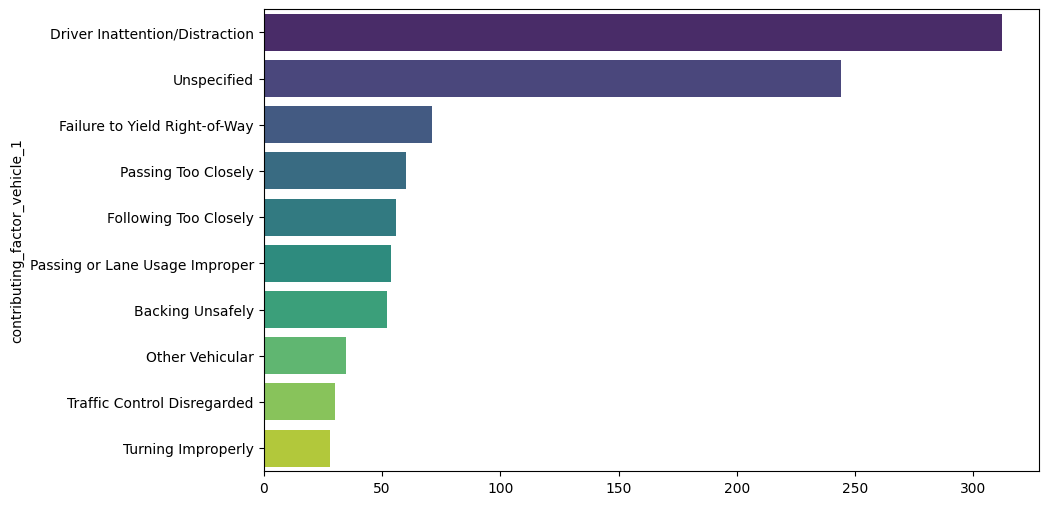

In [ ]:
factors = borough_df['contributing_factor_vehicle_1'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=factors.values, y=factors.index, palette='viridis')

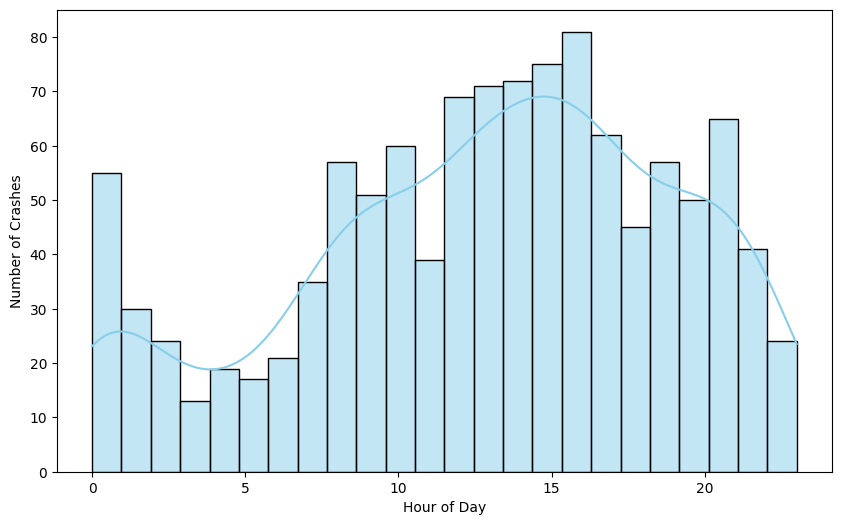

Text(0, 0.5, 'Number of Crashes')

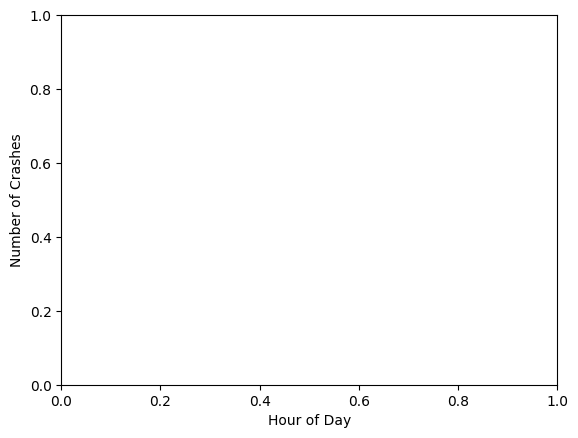

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming borough_df is defined and contains 'crash_time' column
plt.figure(figsize=(10, 6))
sns.histplot(borough_df['crash_time'], bins=24, kde=True, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.show()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')

In [ ]:
# Most popular contributing factors by Crash time
borough_df['crash_time'] = pd.to_datetime(borough_df['crash_time'], format='%H:%M', errors='coerce').dt.hour
borough_df['crash_hour'] = borough_df['crash_time'].dt.hour



<ipython-input-17-0d92849c30f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borough_df['crash_time'] = pd.to_datetime(borough_df['crash_time'], format='%H:%M', errors='coerce').dt.hour


AttributeError: Can only use .dt accessor with datetimelike values